In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os
from util import HISTORICAL_FILE

In [2]:
df = pd.read_excel(HISTORICAL_FILE, keep_default_na=False)

#reads projects from Excel file

len(df)
df.head()

,PROJECTS,COMMITS,Virtuoso-NoSql,Memcached,Ignite-NoSql,MarkLogic,GoogleCloudDatastore,Ignite-Sql,FileMaker,Hive,...,MS Access,Virtuoso,CouchDB,ClickHouse,MicrosoftAzureTableStorage,Vertica,Teradata,PostGIS,Etcd,MySQL
0,Activiti,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Activiti,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Activiti,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Activiti,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Activiti,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
df.iloc[: , 2:].sum().sort_values(ascending=False)

MySQL                         822
Ehcache                       566
PostgreSQL                    501
H2                            490
Oracle                        388
Redis                         336
Impala                        331
MongoDB                       228
SQLite                        222
MS SQL Server                 211
MariaDB                       204
GoogleCloudDatastore          196
IBM DB2                       164
Elasticsearch                 159
SapAdaptiveServer             110
HBase                         109
CouchDB                        99
Cassandra                      99
DynamoDB                       93
Hive                           85
Hazelcast                      78
Solr                           78
FirebaseRealtime               75
Informix                       61
Memcached                      60
Firebird                       53
MarkLogic-NoSql                45
Realm                          45
SapHana                        44
PostGIS       

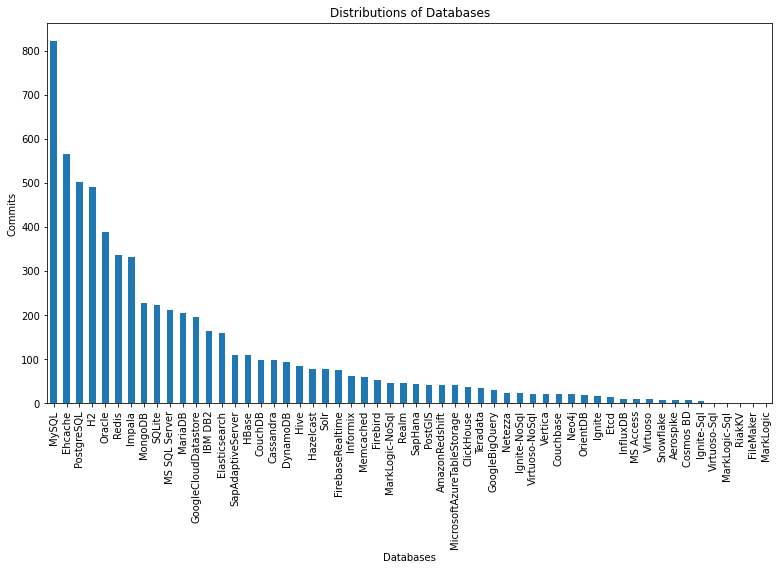

In [4]:
plt.figure(figsize=(13,7))
df.iloc[: , 2:].sum().sort_values(ascending=False).plot(kind='bar', title="Distributions of Databases")
plt.xlabel("Databases")
plt.ylabel("Commits")
plt.show()

In [5]:
#df2 = df 
df2 = df.groupby("PROJECTS").sum()
#df2 = df2["COMMITS"].sum().sort_values(ascending=False)
df2

,COMMITS,Virtuoso-NoSql,Memcached,Ignite-NoSql,MarkLogic,GoogleCloudDatastore,Ignite-Sql,FileMaker,Hive,Redis,...,MS Access,Virtuoso,CouchDB,ClickHouse,MicrosoftAzureTableStorage,Vertica,Teradata,PostGIS,Etcd,MySQL
PROJECTS,,,,,,,,,,,,,,,,,,,,,
Activiti,55,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,6
AmazeFileManager,55,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Android-IMSI-Catcher-Detector,55,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Anki-Android,55,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AntennaPod,55,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zeebe,55,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zeppelin,55,0,0,8,0,10,0,0,9,8,...,0,0,8,0,0,0,0,0,0,8
zipkin,55,0,0,0,0,0,0,0,0,0,...,0,0,9,0,0,0,0,0,0,9


In [29]:
colunas = list(df2.columns)
#print (colunas[0:])
#colunas.insert(0,'PROJECTS')
#print (colunas)
#colunas[3:]
#df2.columns.list()

df3 = pd.DataFrame(data = df2.groupby("PROJECTS").sum(), columns=colunas)

df3 = df3.to_excel("db_count.xlsx", index=True)

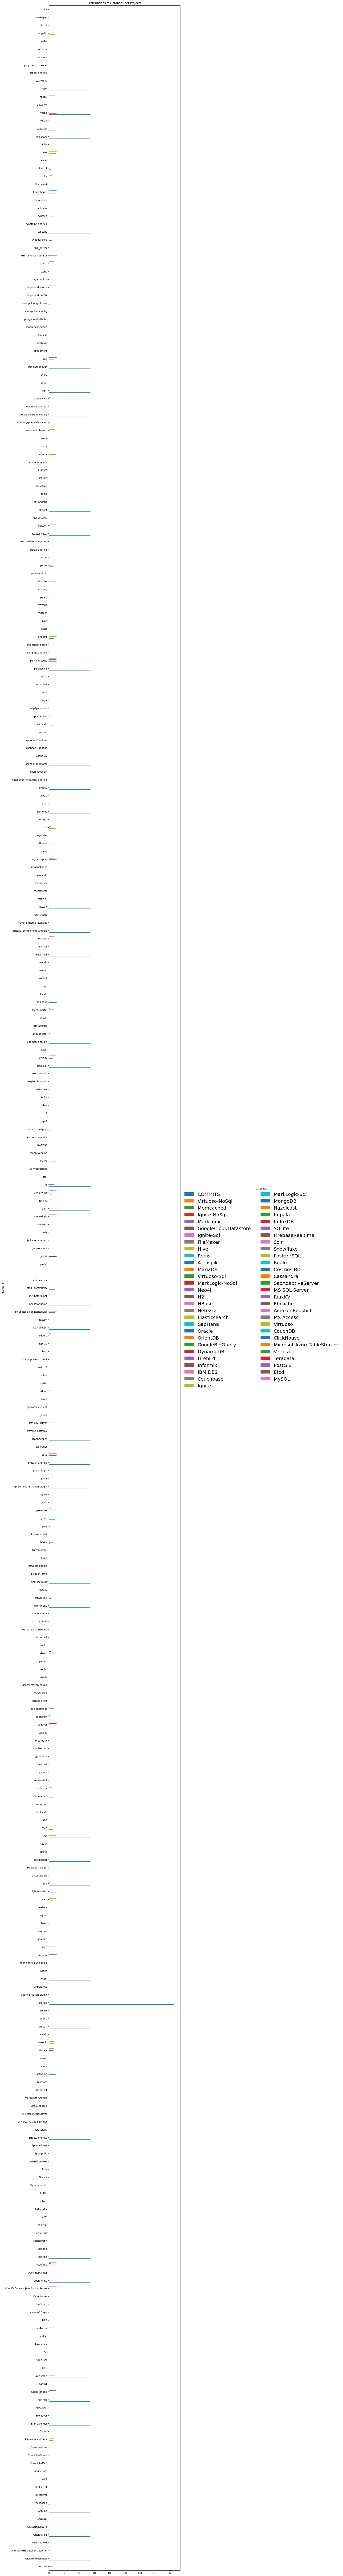

In [84]:
#plt.figure(size=(25,20))
#plt.figure(figsize=(100,90))
plt.rcParams['figure.figsize'] = (10,200)
#plt.rcParams['figure.figsize'] = (11,7)
#Melhorar este gráfico
df2.plot(kind='barh')
#plt.bar(X, Y, label = 'Databases')
#plt.yticks(rotation=-45)
plt.title("Distributions of Databses per Projects")
plt.legend(title = "Databases:", frameon=False, ncol=2, prop={'size':20}, loc='center left', bbox_to_anchor=(1,0.5))
#plt.xlabel("Amounts")
#plt.ylabel("PROJECTS")
plt.show()

In [48]:
#Para apresentar quantos BDs apareceram por Projeto
def num_missing(x):
   return sum(x >= 1)-1
df2.apply(num_missing, axis=1)

PROJECTS
Activiti                          8
AmazeFileManager                  0
Android-IMSI-Catcher-Detector     1
Anki-Android                      0
AntennaPod                        0
                                 ..
zeebe                             1
zeppelin                         21
zipkin                           10
zookeeper                         1
zotfile                           0
Length: 323, dtype: int64

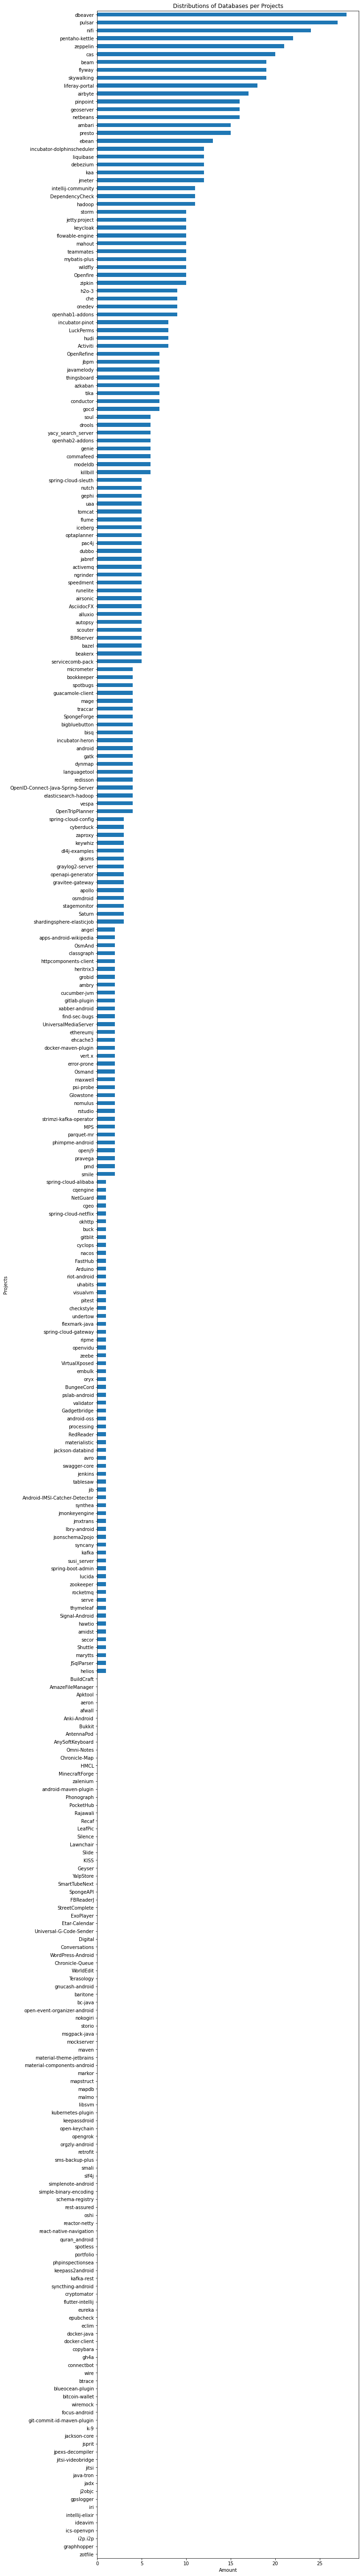

In [90]:
#plt.figure(figsize=(60,50)) 112 projetos sem indício de BD
plt.rcParams['figure.figsize'] = (10,100)
df2.apply(num_missing, axis=1).sort_values(ascending=True).plot(kind='barh', title = 'Distributions of Databases per Projects')
plt.xlabel("Amount")
plt.ylabel("Projects")
plt.show() 

In [50]:
#Para apresentar os projetos em que o indício de BD apareceu em todos os commits
def full_commits(x):
   return sum(x == 10)
df2.apply(full_commits, axis=1)


PROJECTS
Activiti                         0
AmazeFileManager                 0
Android-IMSI-Catcher-Detector    0
Anki-Android                     0
AntennaPod                       0
                                ..
zeebe                            0
zeppelin                         1
zipkin                           0
zookeeper                        0
zotfile                          0
Length: 323, dtype: int64

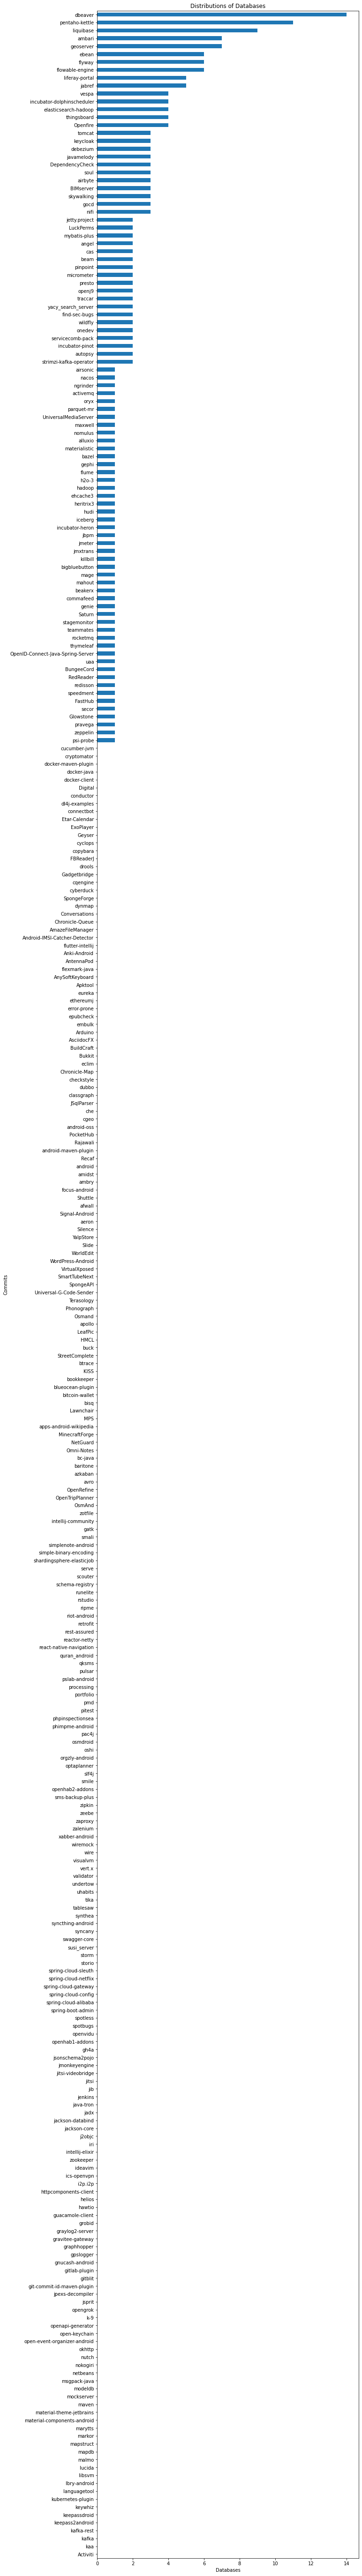

In [89]:
#plt.figure(figsize=(50,60))
plt.rcParams['figure.figsize'] = (10,100)
df2.apply(full_commits, axis=1).sort_values(ascending=True).plot(kind='barh', title="Distributions of Databases")
plt.xlabel("Databases")
plt.ylabel("Commits")
plt.show()

In [ ]:

#Não está trazendo os projetos que aparecem em parte dos commits
#Para apresentar os projetos em que o indício de BD apareceu em todos os commits
def less_commits(x):
   #return sum(x/10)
   return sum(x mod 10 )
df2.apply(less_commits, axis=1)

